## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [32]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn.svm import SVC
from plotnine import *

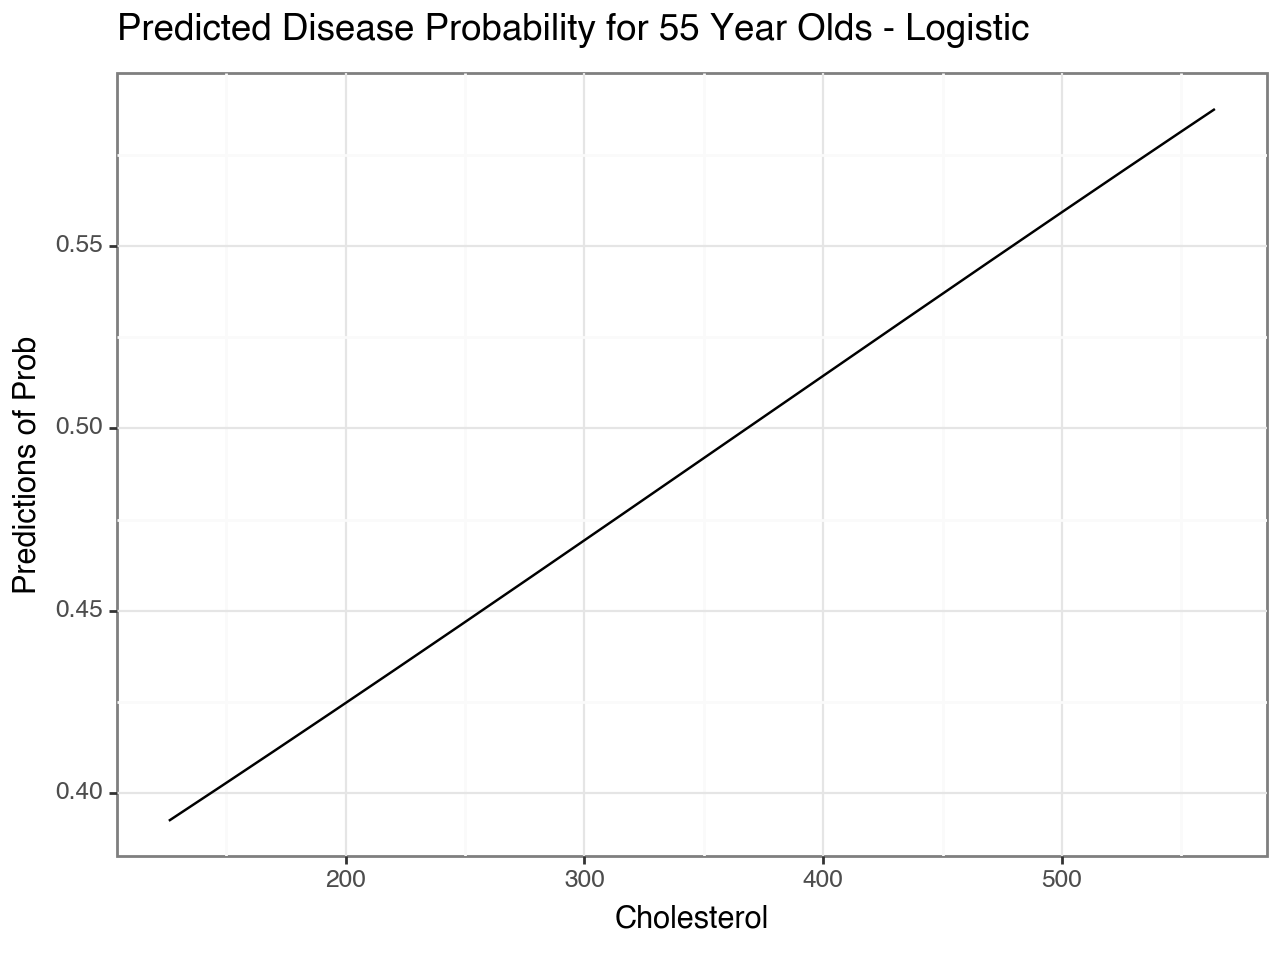

<Figure Size: (640 x 480)>

In [20]:
data = pd.read_csv("/Users/rileysvensson/Desktop/GSB_544/Practice_Activties/ha_1.csv")

ha_1 = pd.DataFrame(data)


# Preprocessing

X = ha_1.drop(["diagnosis"], axis = 1)
y = ha_1["diagnosis"]


ct_2 = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],
    remainder='drop'
)

logistic_pipeline_1 = Pipeline(
  [("preprocessing", ct_2),
  ("logistic", LogisticRegression())]
)

# 
log_pipeline_fitted_best = logistic_pipeline_1.fit(X, y)


# 55 yr old, how high to predict Disease present.
# Rows of 55 yr olds, with ranging cholesterol's 126 to 564 by 2, predict probabilities for all of them, and graph it 

ha_1['chol'].max() # 564
ha_1['chol'].min() # 126

cholesterol_values = list(range(126, 566, 2))
data = pd.DataFrame({'age': [55] * len(cholesterol_values), 'chol': cholesterol_values})

y_probs_log = log_pipeline_fitted_best.predict_proba(data)[:, 1]

# Add the predicted probabilities to the DataFrame
data['predicted_disease_probability'] = y_probs_log

# Creating a plot
(
    ggplot(data, aes(x='chol', y='predicted_disease_probability')) +
    geom_line() +
    theme_bw() +
    labs(
        title="Predicted Disease Probability for 55 Year Olds",
        x="Cholesterol",
        y="Predictions of Prob"))



In [21]:
# Find the row where 'predicted_disease_probability' is closest to 0.5
closest_to_50 = data.iloc[(data['predicted_disease_probability'] - 0.5).abs().argsort()[:1]]
closest_to_50

,age,chol,predicted_disease_probability
121,55,368,0.500006


**The cutoff for cholesterol at which doctors would predict a heart disease present is 368 for our Logistic Model.**

## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

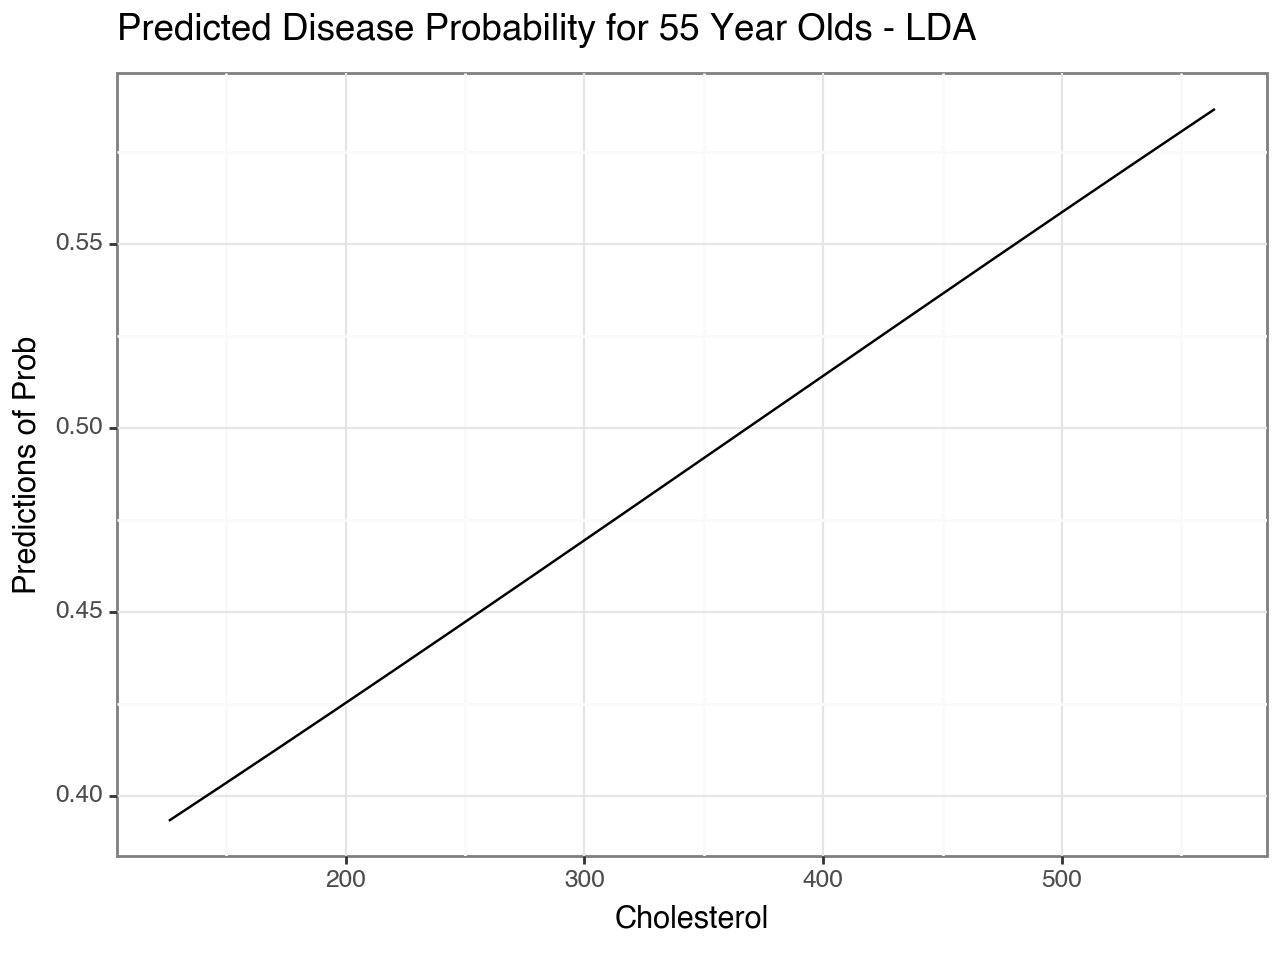

<Figure Size: (640 x 480)>

In [29]:
# Preprocessing

ct_2 = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],
    remainder='drop'
)

lda_pipeline_1 = Pipeline(
  [("preprocessing", ct_2),
  ("lda", LinearDiscriminantAnalysis())]
)

# 
lda_pipeline_fitted_best = lda_pipeline_1.fit(X, y)


# 55 yr old, how high to predict Disease present.
# Rows of 55 yr olds, with ranging cholesterol's 126 to 564 by 2, predict probabilities for all of them, and graph it 

ha_1['chol'].max() # 564
ha_1['chol'].min() # 126

cholesterol_values = list(range(126, 566, 2))
data_lda = pd.DataFrame({'age': [55] * len(cholesterol_values), 'chol': cholesterol_values})

y_probs_lda = lda_pipeline_fitted_best.predict_proba(data_lda)[:, 1]

# Add the predicted probabilities to the DataFrame
data_lda['predicted_disease_probability'] = y_probs_lda

# Creating a plot
(
    ggplot(data_lda, aes(x='chol', y='predicted_disease_probability')) +
    geom_line() +
    theme_bw() +
    labs(
        title="Predicted Disease Probability for 55 Year Olds - LDA",
        x="Cholesterol",
        y="Predictions of Prob"))



In [30]:
# Find the row where 'predicted_disease_probability' is closest to 0.5
closest_to_50_lda = data.iloc[(data_lda['predicted_disease_probability'] - 0.5).abs().argsort()[:1]]
closest_to_50_lda

,age,chol,predicted_disease_probability
121,55,368,0.500006


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [37]:
# Preprocessing

ct_2 = ColumnTransformer(
    [("standardize", StandardScaler(), ["age", "chol"])],
    remainder='drop'
)

svc_pipeline_1 = Pipeline(
  [("preprocessing", ct_2),
  ("svc", SVC(probability = True))]
)

# SVC 
parameters_svc = {'svc__C': (0.001, 0.01, 0.1, 1, 10, 100)}

gscv = GridSearchCV(svc_pipeline_1, parameters_svc, cv = 5, scoring='f1_macro')

gscv_fitted_svc = gscv.fit(X, y)

gscv_fitted_svc.cv_results_

means_svc = gscv_fitted_svc.cv_results_['mean_test_score']
params = gscv_fitted_svc.cv_results_['params']

best_model_svc = {'x': params, 'f1_macro': means_svc}
best_model_svc = pd.DataFrame(best_model_svc)
pd.set_option('display.max_colwidth', None)
best_model_svc = best_model_svc.sort_values(by = "f1_macro", ascending = False)
best_model_svc

,x,f1_macro
3,{'svc__C': 1},0.598417
4,{'svc__C': 10},0.541518
5,{'svc__C': 100},0.515810
2,{'svc__C': 0.1},0.400847
0,{'svc__C': 0.001},0.360516
1,{'svc__C': 0.01},0.360516


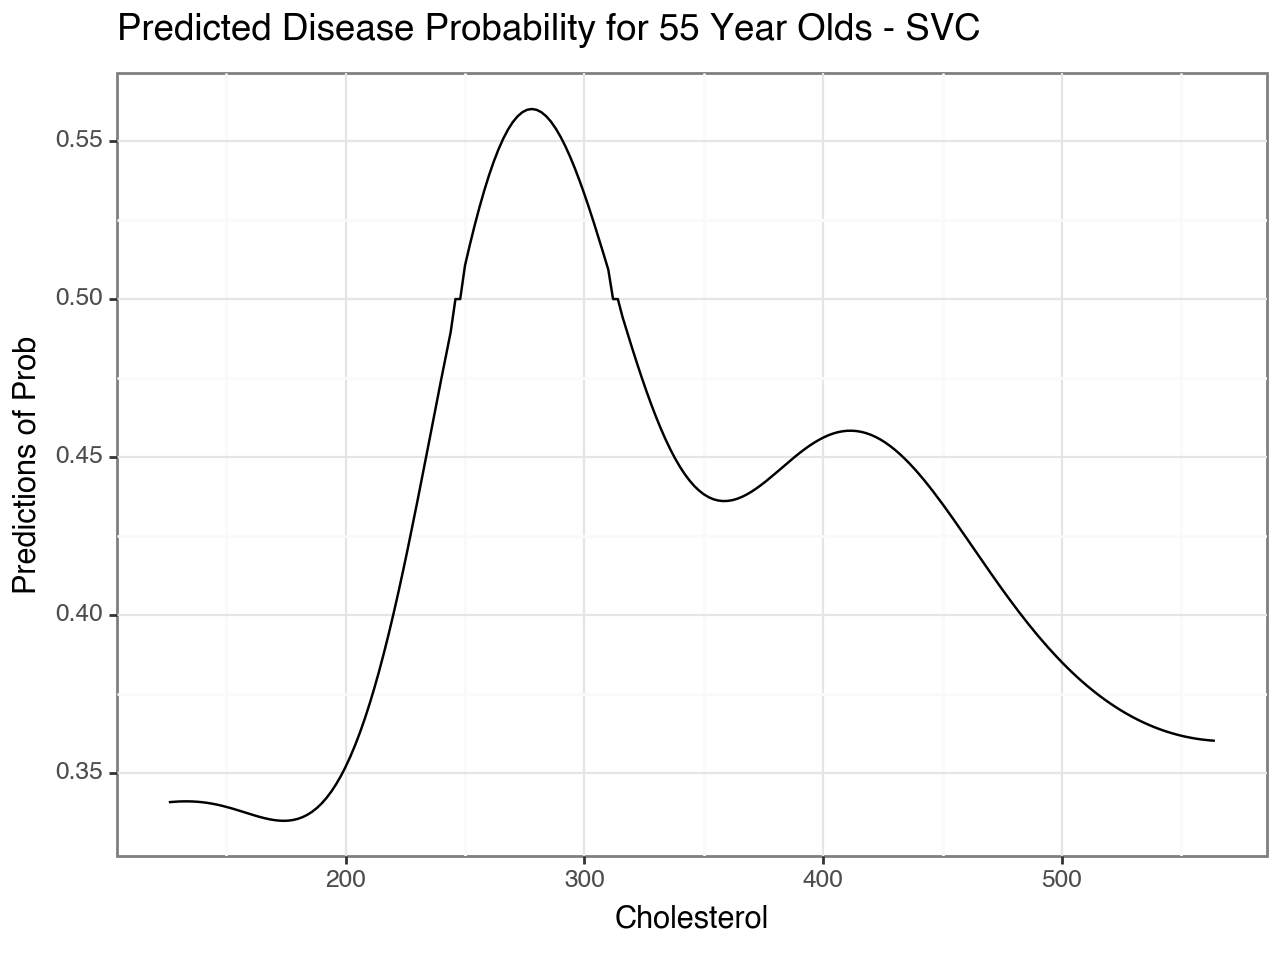

<Figure Size: (640 x 480)>

In [38]:
# Retune Pipeline with optimal C value

svc_pipeline_best = Pipeline(
  [("preprocessing", ct_2),
  ("svc", SVC(C = 1, probability = True))]
)

svc_pipeline_fitted_best = svc_pipeline_best.fit(X, y)


# 55 yr old, how high to predict Disease present.
# Rows of 55 yr olds, with ranging cholesterol's 126 to 564 by 2, predict probabilities for all of them, and graph it 

ha_1['chol'].max() # 564
ha_1['chol'].min() # 126

cholesterol_values = list(range(126, 566, 2))
data_svc = pd.DataFrame({'age': [55] * len(cholesterol_values), 'chol': cholesterol_values})

y_probs_svc = svc_pipeline_fitted_best.predict_proba(data_svc)[:, 1]

# Add the predicted probabilities to the DataFrame
data_svc['predicted_disease_probability'] = y_probs_svc

# Creating a plot
(
    ggplot(data_svc, aes(x='chol', y='predicted_disease_probability')) +
    geom_line() +
    theme_bw() +
    labs(
        title="Predicted Disease Probability for 55 Year Olds - SVC",
        x="Cholesterol",
        y="Predictions of Prob"))



**From the plot above, it is clear that the Support Vector Model would classify patients with heart disease if they fall within the cholesterol range of 250 to around 310.**

## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

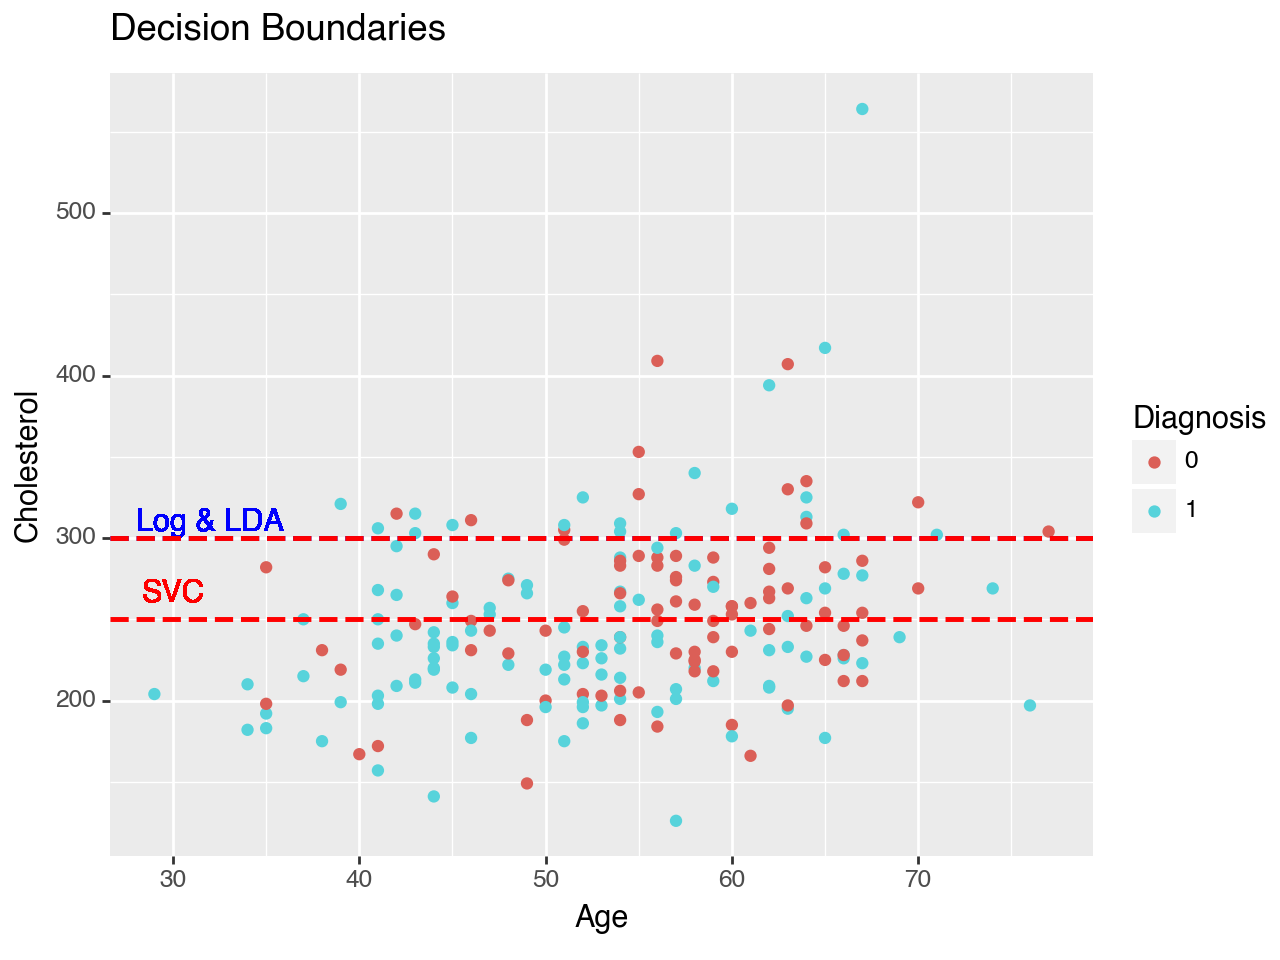

<Figure Size: (640 x 480)>

In [66]:
(ggplot(ha_1, aes(x='age', y='chol', color='factor(diagnosis)')) +
        geom_point() +
        labs(title = "Decision Boundaries", color='Diagnosis', y="Cholesterol", x="Age") +
        geom_hline(yintercept=300, linetype="dashed", color="blue", size=1) +
        geom_text(label="Log & LDA", y=300, x=32, color="blue", va='bottom') +
        geom_hline(yintercept=250, linetype="dashed", color="red", size=1) +
        geom_hline(yintercept=300, linetype="dashed", color="red", size=1) +
        geom_text(label="SVC", y=275, x=30, color="red", va='top'))

